In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from scipy.sparse import hstack
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('/Users/sarabjotsingh/Downloads/filtered_dataset.csv')

In [3]:
# Separate numerical and categorical features
numerical_features = ['odometer', 'year', 'mmr']
categorical_features = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

In [4]:
# Preprocessing for numerical features: scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [5]:
# Preprocessing for categorical features: one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

In [8]:
# Convert encoder categories to a list
categories_list = [cat for cat_list in encoder.categories_ for cat in cat_list]

In [9]:
# Save encoder categories as a list
np.save('encoder_categories.npy', categories_list)

In [11]:
 #Save encoded features to a file
with open('encoded_features.npy', 'wb') as f:
    np.save(f, encoded_features.toarray())

In [14]:
# Stack numerical and encoded categorical features horizontally
X_final = hstack([df[numerical_features].values, encoded_features])
y =  df['sellingprice']

In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [16]:
# Train XGBoost model
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# Save the trained model to a JSON file
xgboost_model.save_model('xgboost_model.json')


In [18]:
# Make predictions
y_pred = xgboost_model.predict(X_test)

In [19]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 3097567.9007950234
Mean Absolute Error (MAE): 1047.5432685449425
R-squared: 0.9510731133303051
Root Mean Squared Error (RMSE): 1759.9908808840526


In [36]:
# Convert y_test to an array if it's in CSR matrix format
if hasattr(y_test, 'toarray'):
    y_test = y_test.toarray().flatten()
else:
    y_test = np.array(y_test)

# Convert predicted_lower_bound and predicted_upper_bound to arrays
predicted_lower_bound = np.array(predicted_lower_bound).flatten()
predicted_upper_bound = np.array(predicted_upper_bound).flatten()

# Compare predicted price and MMR to determine lower and upper bounds of the range
predicted_lower_bound = np.minimum(predicted_lower_bound, y_test)
predicted_upper_bound = np.maximum(predicted_upper_bound, y_test)

# Convert predicted_lower_bound and predicted_upper_bound to arrays if they are in CSR matrix format
if hasattr(predicted_lower_bound, 'toarray'):
    predicted_lower_bound = predicted_lower_bound.toarray().flatten()
if hasattr(predicted_upper_bound, 'toarray'):
    predicted_upper_bound = predicted_upper_bound.toarray().flatten()

# Print data types
print(type(predicted_lower_bound))
print(type(predicted_upper_bound))
print(type(y_test))

# Print predicted ranges vs actual values
for lower, upper, actual in zip(predicted_lower_bound, predicted_upper_bound, y_test):
    print(lower, upper, actual)


/var/folders/h_/kssb81453xb2cjn36fxdy_z40000gn/T/ipykernel_14643/3550358092.py:12: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  predicted_lower_bound = np.minimum(predicted_lower_bound, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
 21919.69921875 20000.0
 10031.3427734375 9300.0
 18000.0 18000.0
 13219.0673828125 12200.0
 10600.0 10600.0
 20400.0 20400.0
 17600.0 17600.0
 18900.0 18900.0
 9725.37890625 9500.0
 12600.0 12600.0
 21411.64453125 16250.0
 9537.2763671875 9000.0
 10400.0 10400.0
 17000.0 17000.0
 22500.0 22500.0
  (0, 0)	1.0 11100.0 11100.0
 18200.0 18200.0
 19000.0 19000.0
 9714.3603515625 9200.0
 12146.6650390625 11500.0
 34000.0 34000.0
 29157.21484375 23700.0
 11941.609375 11400.0
 10500.0 10500.0
 10750.0 10750.0
  (0, 0)	1.0 44000.0 44000.0
 11400.0 11400.0
 9577.7890625 9500.0
 9000.0 9000.0
 8100.0 8100.0
 18600.0 18600.0
 17282.2890625 16800.0
 16410.916015625 15300.0
 21300.0 21300.0
 11800.0 11800.0
 21200.0 21200.0
 7700.0 7700.0
 31750.0 31750.0
 16700.0 16700.0
 12300.0 12300.0
 9026.865234375 6000.0
 14587.1513671875 13400.0
 13216.42578125 13200.0
 10149.58203125 8700.0
 9812.8701171875 9400.0
 16814.126953125 1120

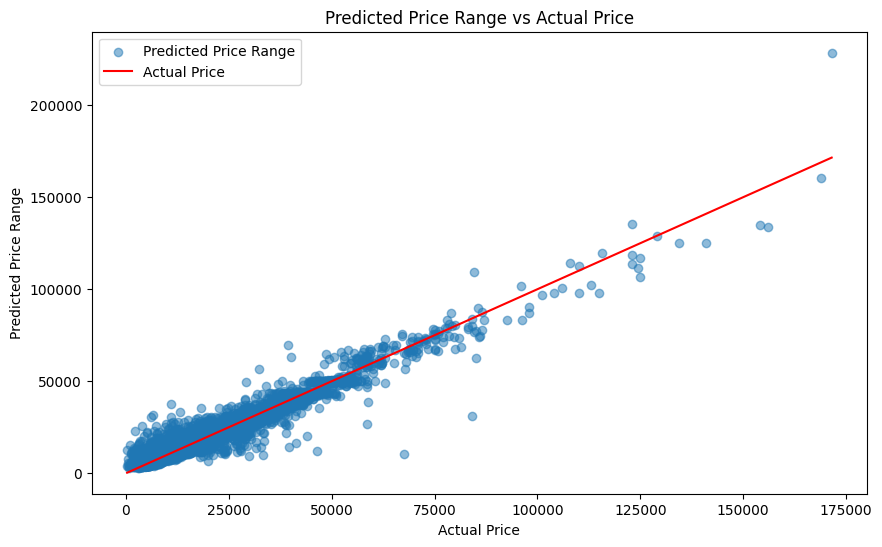

In [37]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted Price Range')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price Range')
plt.title('Predicted Price Range vs Actual Price')
plt.legend()
plt.show()